<a href="https://colab.research.google.com/github/Dahernandezsilve/HT1MD/blob/main/HT_1_An%C3%A1lisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad del Valle de Guatemala
18 Avenida 11-95 Guatemala      
Departamento de Computación     
Facultad de Ingeniería       
Minería de Datos Sección 10         
Fecha de entrega: 29/01/2024        

Grupo 6 | Integrantes:
- Diego Alexander Hernández Silvestre 21270
- Linda Inés Jimenez Vides 21169
- Daniel Armando Valdez Reyes 21240

## Hoja  de trabajo 3
## Para realizar una exploración inicial del conjunto de datos, se prodeció a realizar un resumen de la información proporcionada en el dataset del archivo "*movies.csv*. A continuación se muestran los resultados: 

In [114]:
import pandas as pd
from scipy.stats import shapiro, ks_2samp, anderson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import *

In [99]:
dataframe: pd.DataFrame = pd.read_csv("train.csv",  encoding='ISO-8859-1')

dataframe.columns
# Se rellenan con 0 los na de PoolQC
dataframe['PoolQC'] = dataframe['PoolQC'].fillna(0)
# Se rellenan con 'None' los na 'MasVnrType'
dataframe['MasVnrType'] = dataframe['MasVnrType'].fillna('None')

dataframe['FireplaceQu'] = dataframe['MasVnrType'].fillna('NA')

dataframe['Fence'] = dataframe['Fence'].fillna('NA')

dataframe['MiscFeature'] = dataframe['MiscFeature'].fillna('NA')


dataframe['LotFrontage'] = dataframe['LotFrontage'].fillna(0)

dataframe['Alley'] = dataframe['Alley'].fillna('NA')


infoSumary = dataframe.info()

#Extraccion de las columnas a utilizar para las pruebas de clustering y regresion lineal
df = dataframe[["LotFrontage", "HouseStyle", "OverallQual","YearBuilt", "YearRemodAdd", "FullBath", "HalfBath", "TotRmsAbvGrd","GarageArea", "GarageCars", "PoolArea", "Fence", "MasVnrArea","SaleCondition", "SaleType", "SalePrice"]]
df



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,LotFrontage,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,FullBath,HalfBath,TotRmsAbvGrd,GarageArea,GarageCars,PoolArea,Fence,MasVnrArea,SaleCondition,SaleType,SalePrice
0,65.0,2Story,7,2003,2003,2,1,8,548,2,0,NA,196.0,Normal,WD,208500
1,80.0,1Story,6,1976,1976,2,0,6,460,2,0,NA,0.0,Normal,WD,181500
2,68.0,2Story,7,2001,2002,2,1,6,608,2,0,NA,162.0,Normal,WD,223500
3,60.0,2Story,7,1915,1970,1,0,7,642,3,0,NA,0.0,Abnorml,WD,140000
4,84.0,2Story,8,2000,2000,2,1,9,836,3,0,NA,350.0,Normal,WD,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,2Story,6,1999,2000,2,1,7,460,2,0,NA,0.0,Normal,WD,175000
1456,85.0,1Story,6,1978,1988,2,0,7,500,2,0,MnPrv,119.0,Normal,WD,210000
1457,66.0,2Story,7,1941,2006,2,0,9,252,1,0,GdPrv,0.0,Normal,WD,266500
1458,68.0,1Story,5,1950,1996,1,0,5,240,1,0,NA,0.0,Normal,WD,142125


In [100]:

# Extrae la información relevante del resumen
info_data = {'Columna': [], 'Non-Null Count': [], 'Dtype': []}

for col in dataframe.columns:
    info_data['Columna'].append(col)
    info_data['Non-Null Count'].append(dataframe[col].count())
    info_data['Dtype'].append(dataframe[col].dtype)

# Crea un nuevo DataFrame a partir de la información extraída
info_df = pd.DataFrame(info_data)

info_df[info_df['Non-Null Count']<1410]


,Columna,Non-Null Count,Dtype
58,GarageType,1379,object
59,GarageYrBlt,1379,float64
60,GarageFinish,1379,object
63,GarageQual,1379,object
64,GarageCond,1379,object


In [101]:
dataframe['SalePrice'] =dataframe['SalePrice'].dropna()
dataframe['SalePrice']


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Columna Id: Estadística=0.9548, p-valor=0.0000
La columna Id no sigue una distribución normal.
Columna MSSubClass: Estadística=0.8046, p-valor=0.0000
La columna MSSubClass no sigue una distribución normal.
Columna LotFrontage: Estadística=0.9006, p-valor=0.0000
La columna LotFrontage no sigue una distribución normal.
Columna LotArea: Estadística=0.3511, p-valor=0.0000
La columna LotArea no sigue una distribución normal.
Columna OverallQual: Estadística=0.9480, p-valor=0.0000
La columna OverallQual no sigue una distribución normal.
Columna OverallCond: Estadística=0.8289, p-valor=0.0000
La columna OverallCond no sigue una distribución normal.
Columna YearBuilt: Estadística=0.9256, p-valor=0.0000
La columna YearBuilt no sigue una distribución normal.
Columna YearRemodAdd: Estadística=0.8628, p-valor=0.0000
La columna YearRemodAdd no sigue una distribución normal.
Columna MasVnrArea: Estadística=nan, p-valor=1.0000
La columna MasVnrArea sigue una distribución normal.
Columna BsmtFinSF1: E

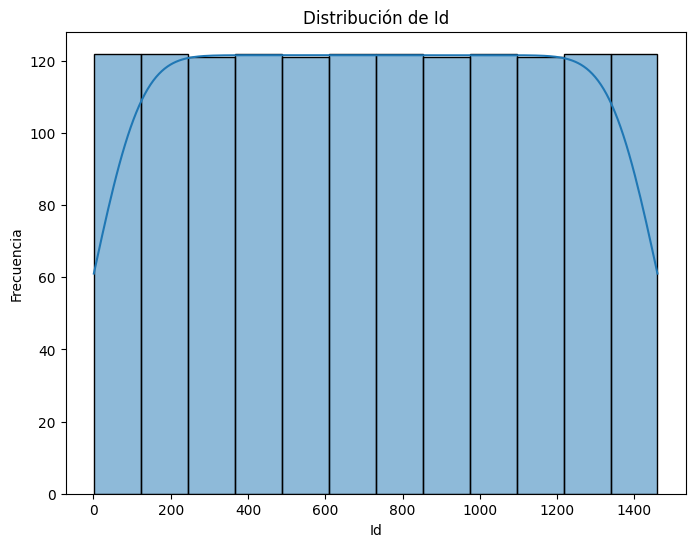

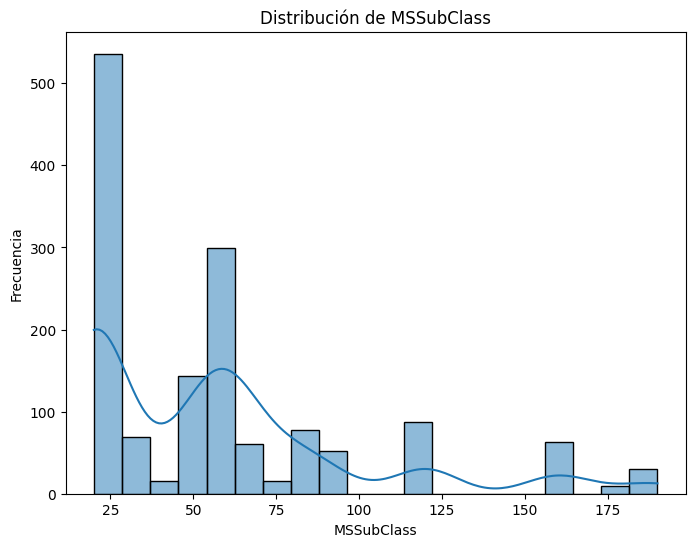

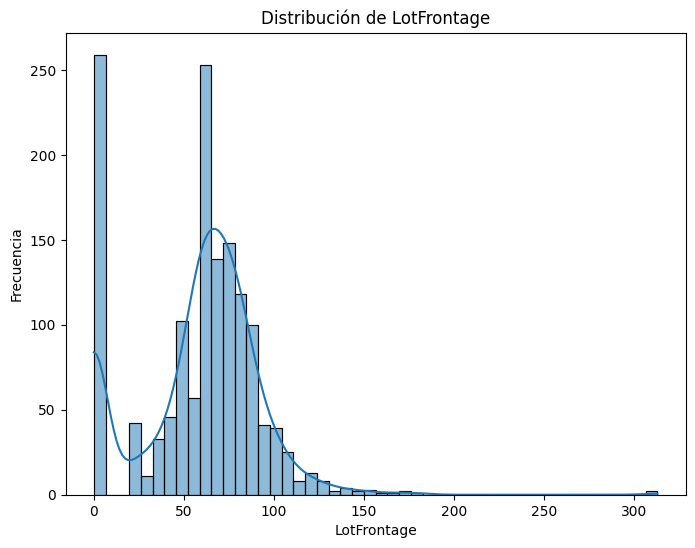

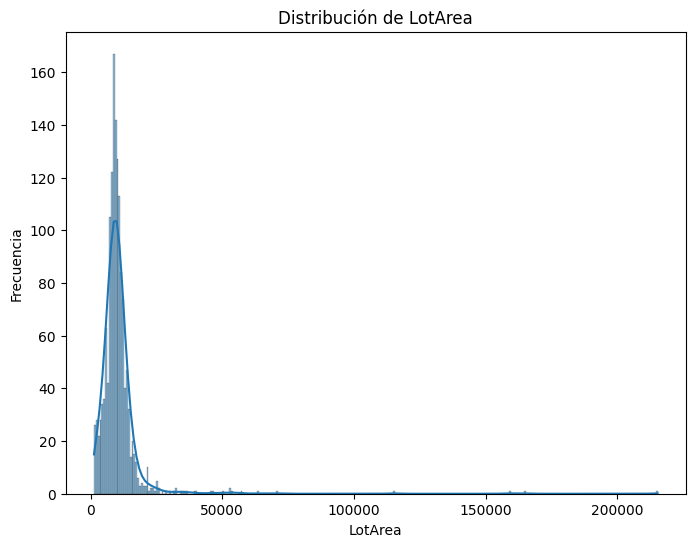

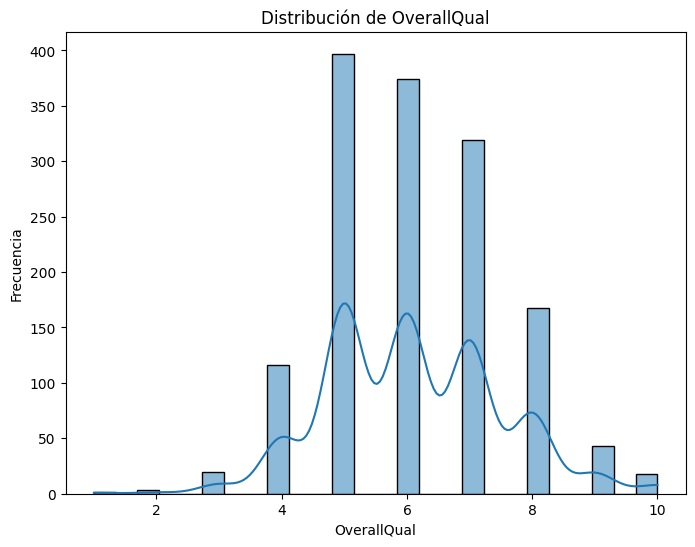

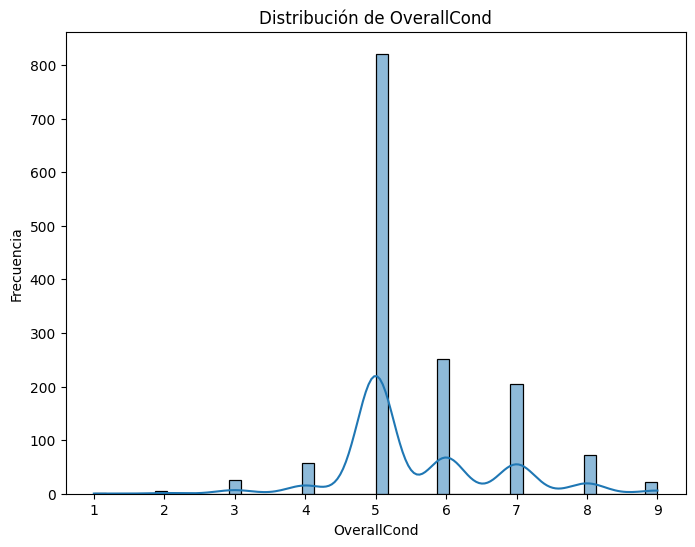

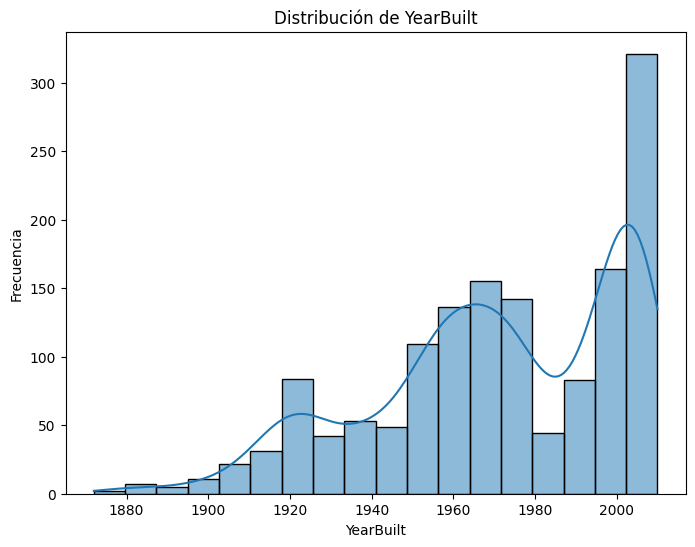

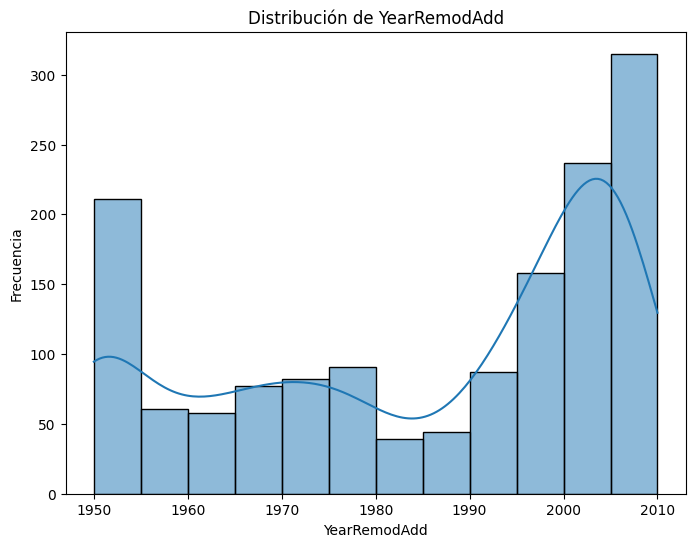

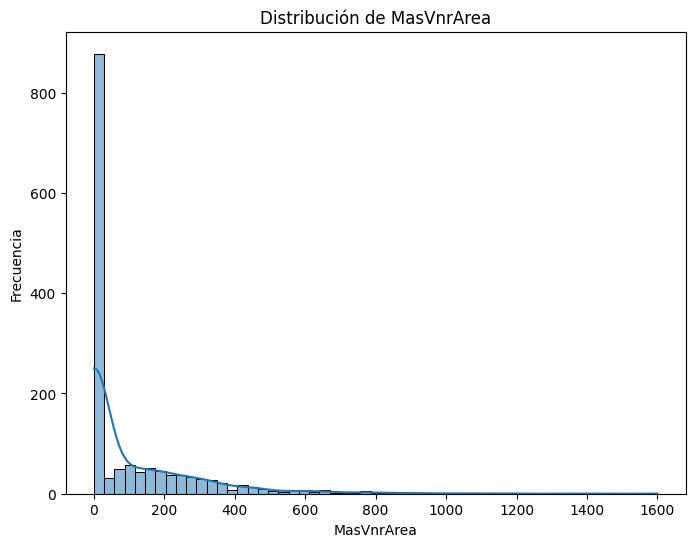

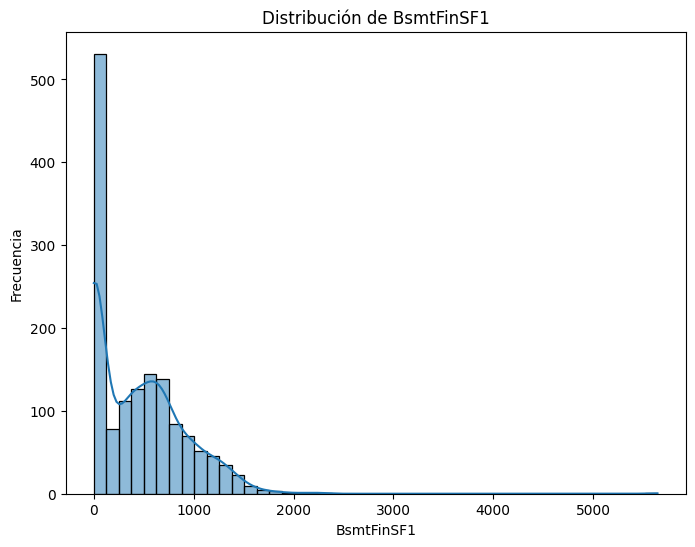

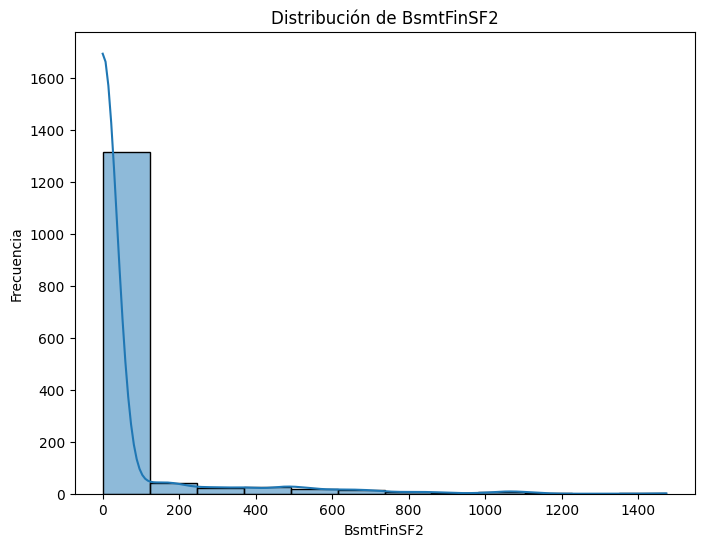

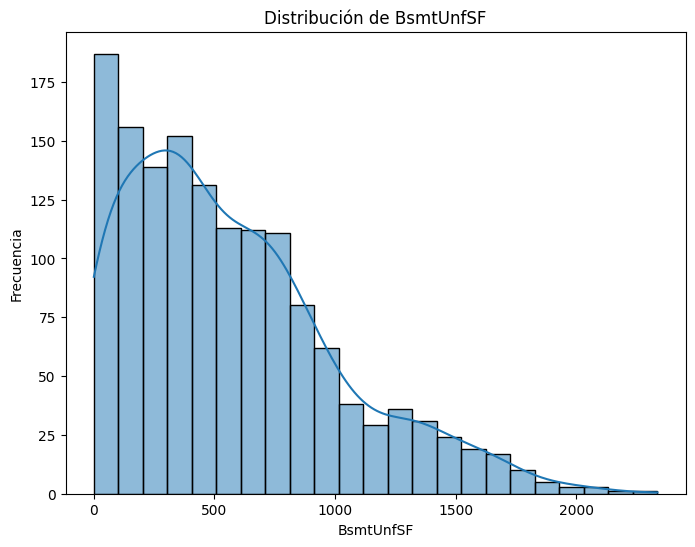

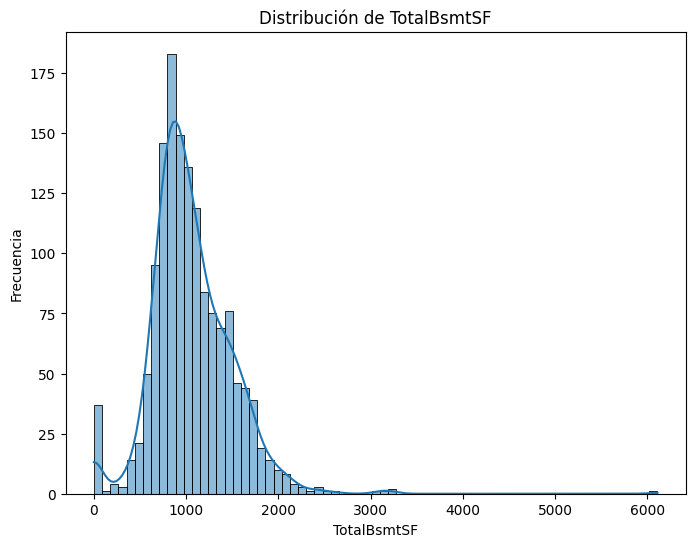

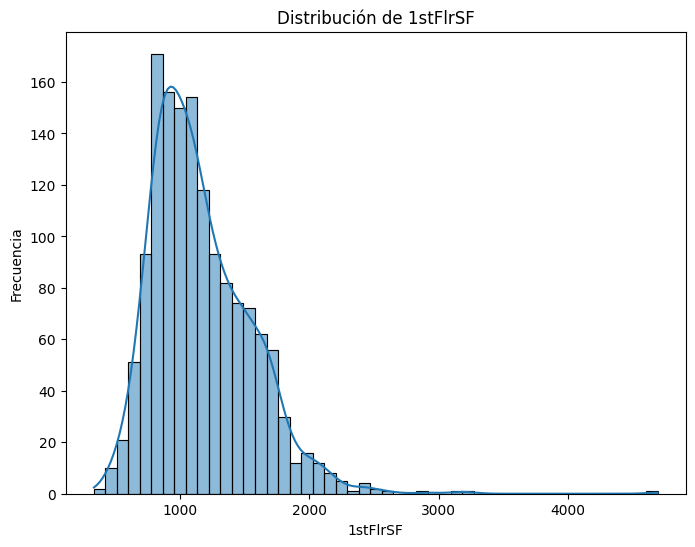

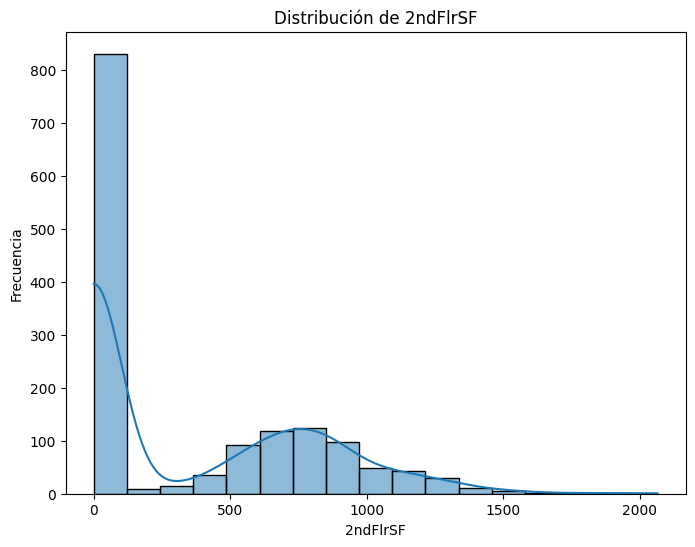

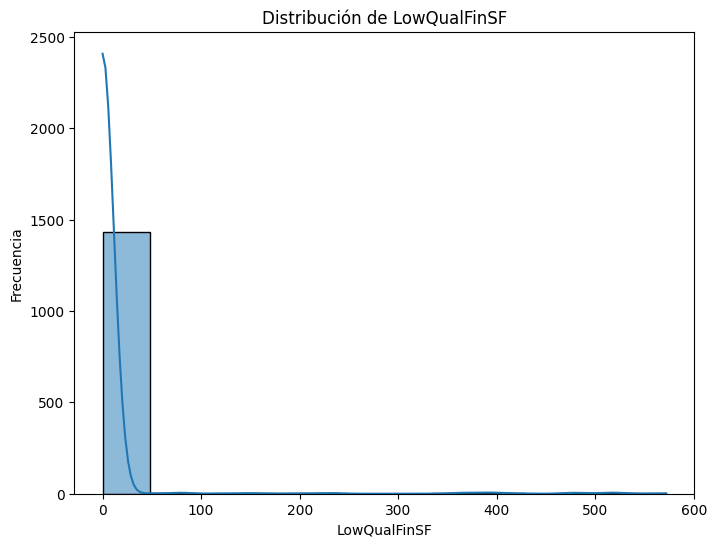

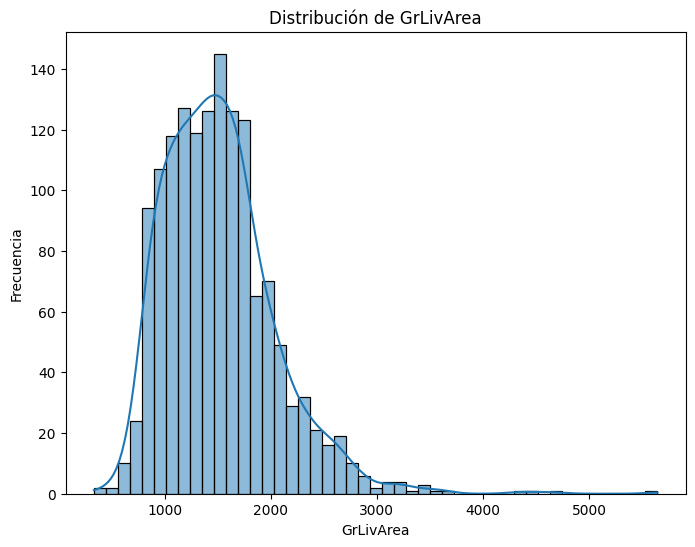

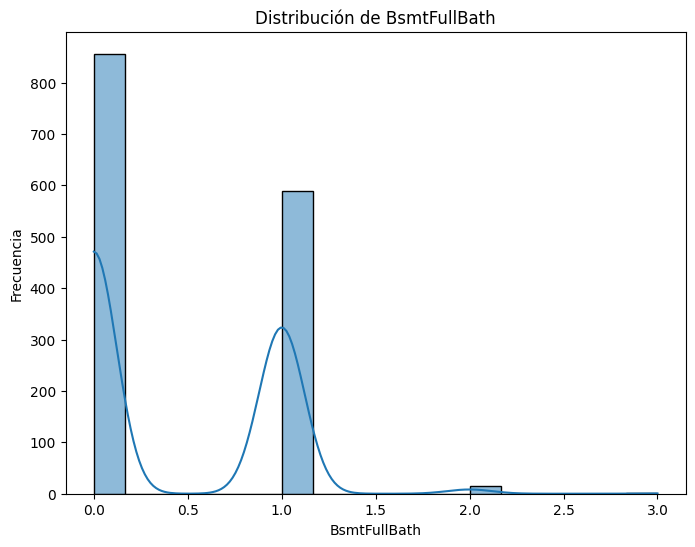

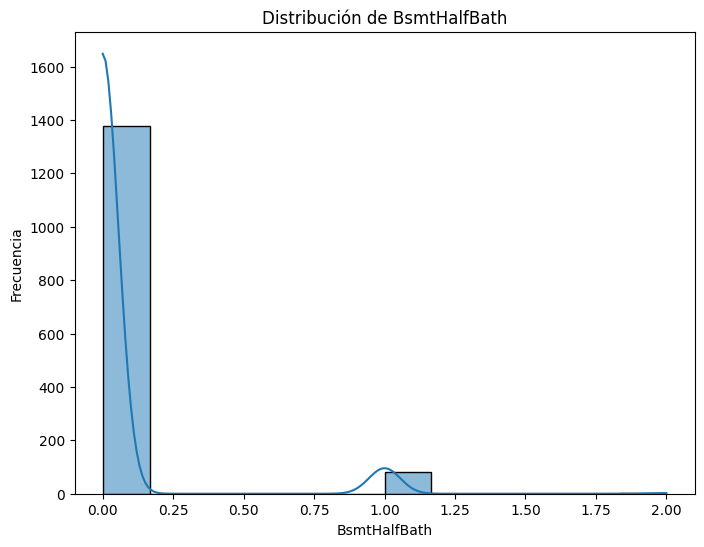

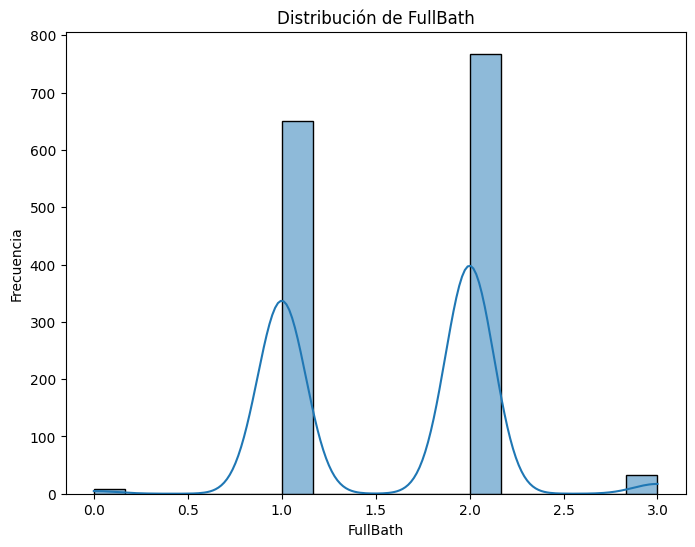

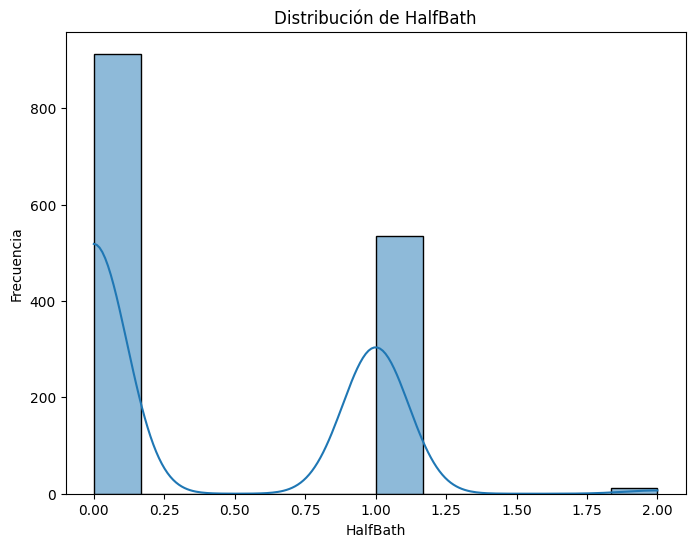

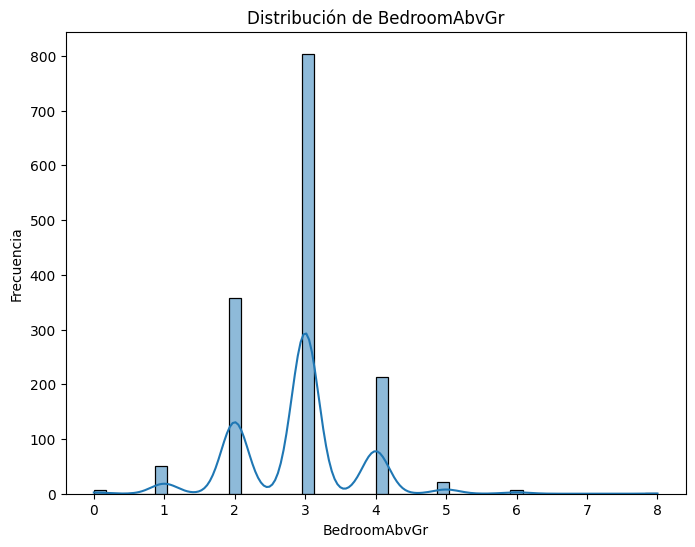

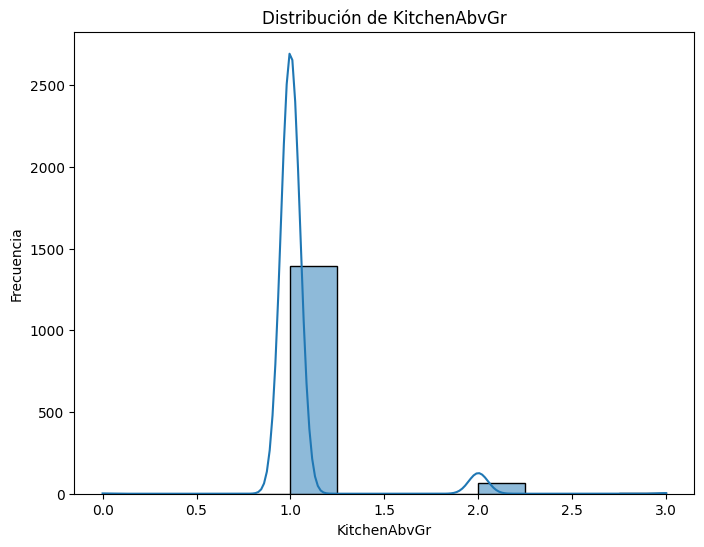

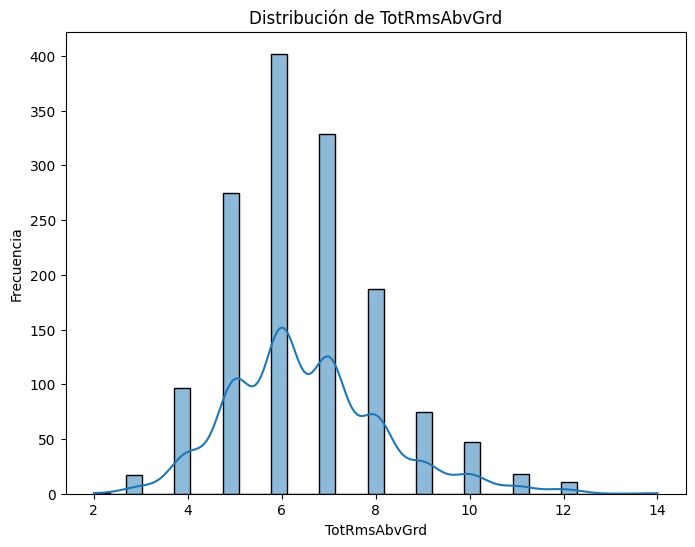

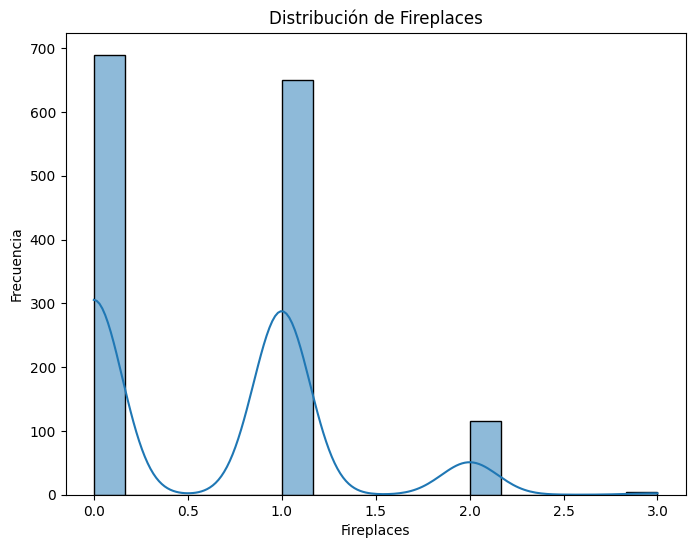

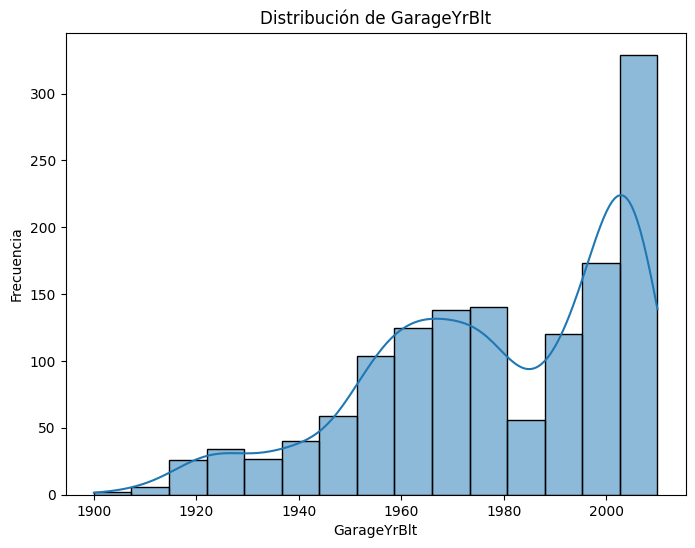

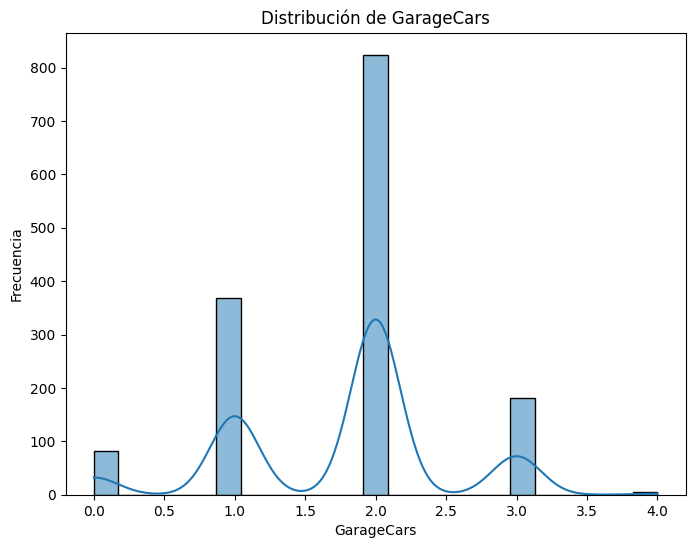

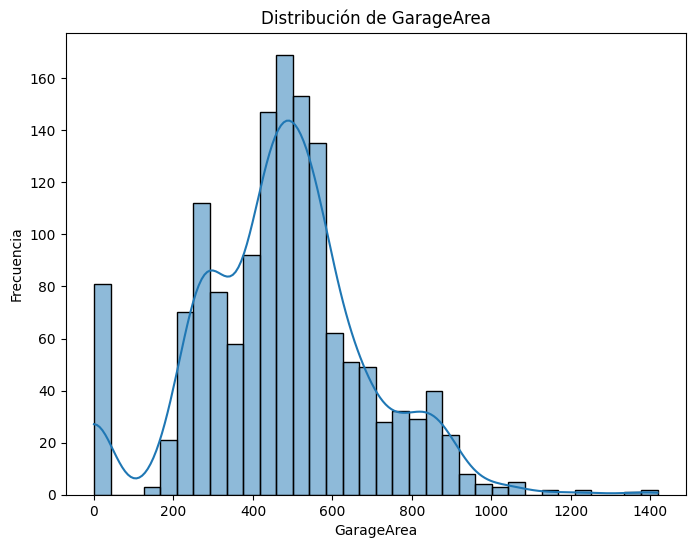

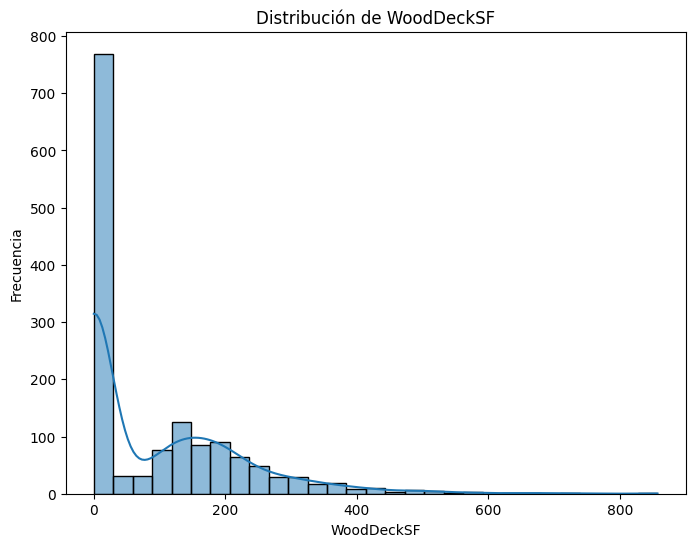

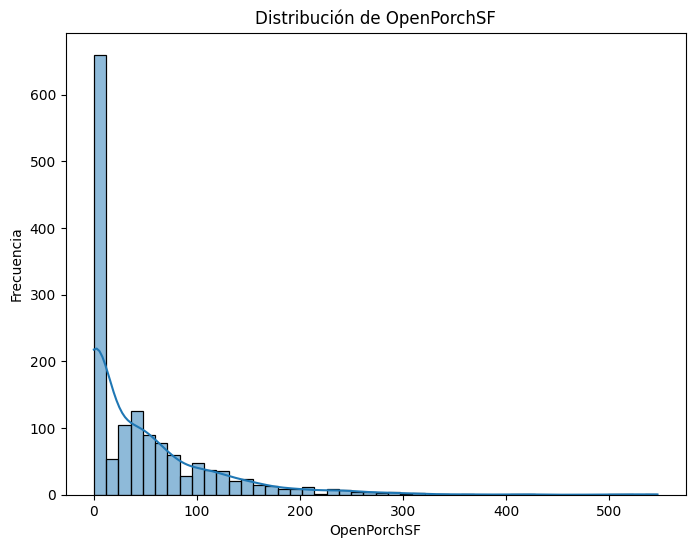

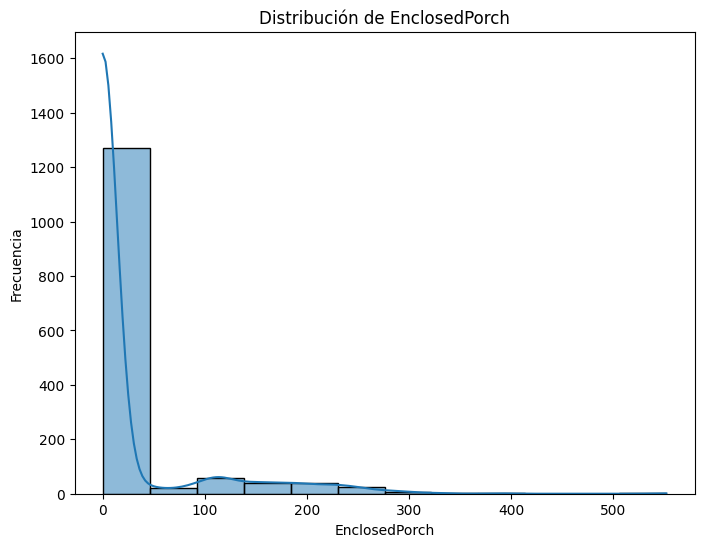

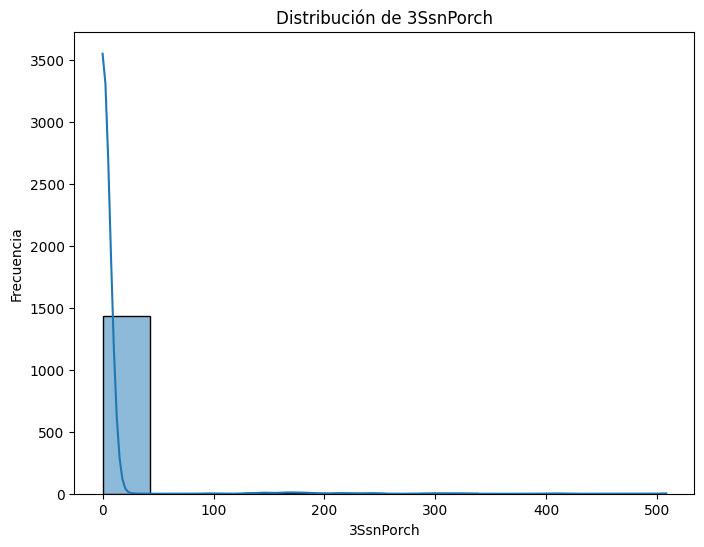

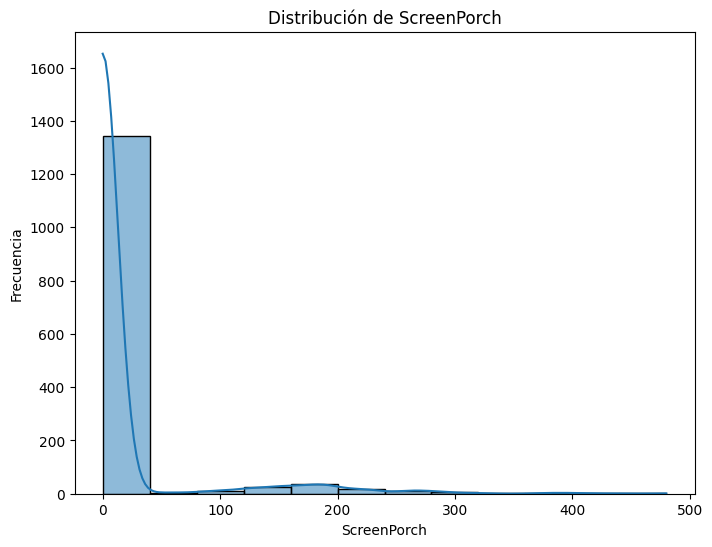

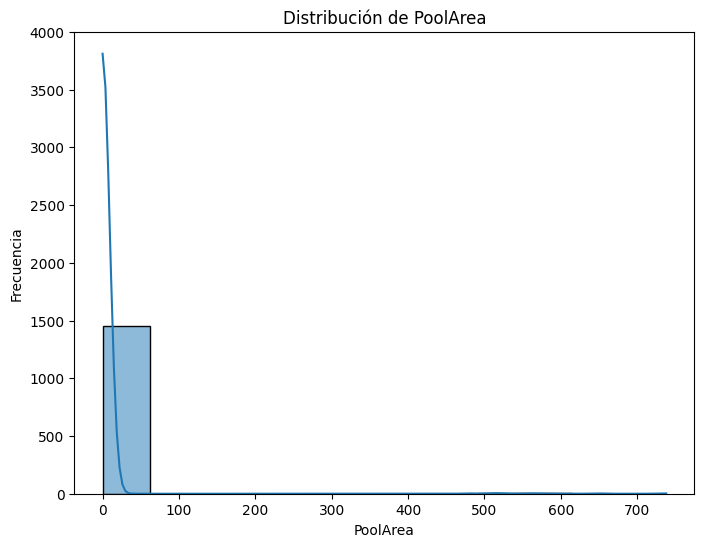

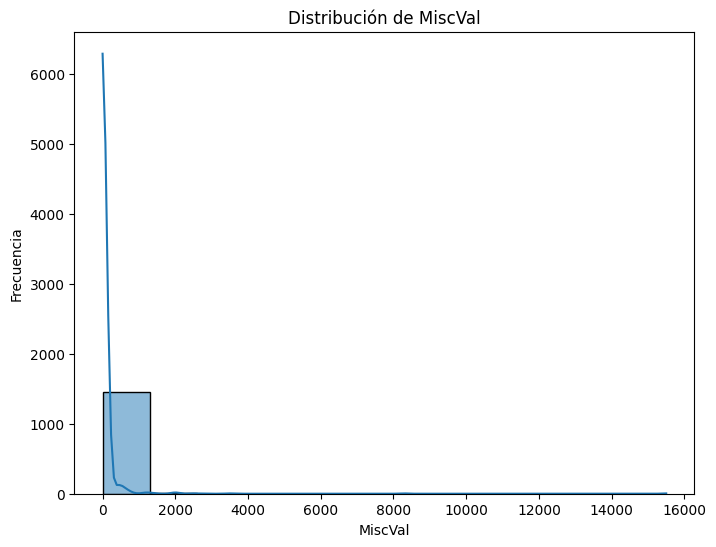

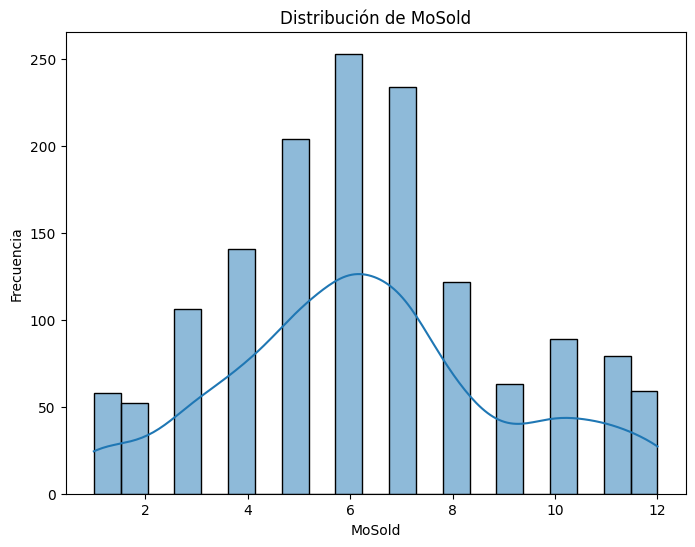

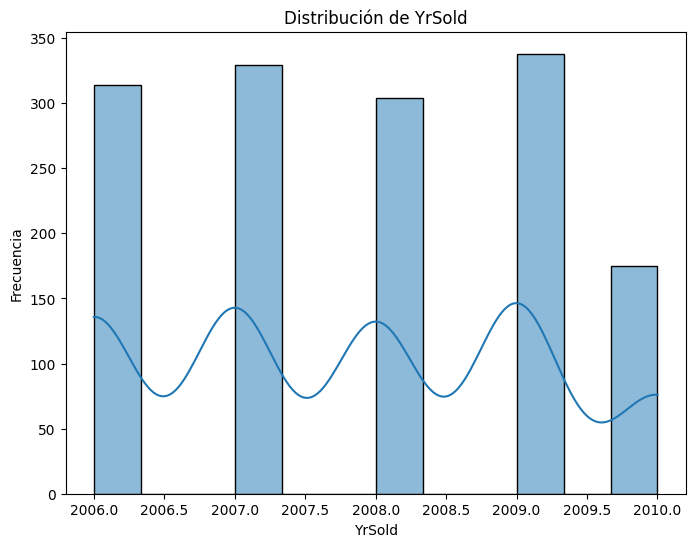

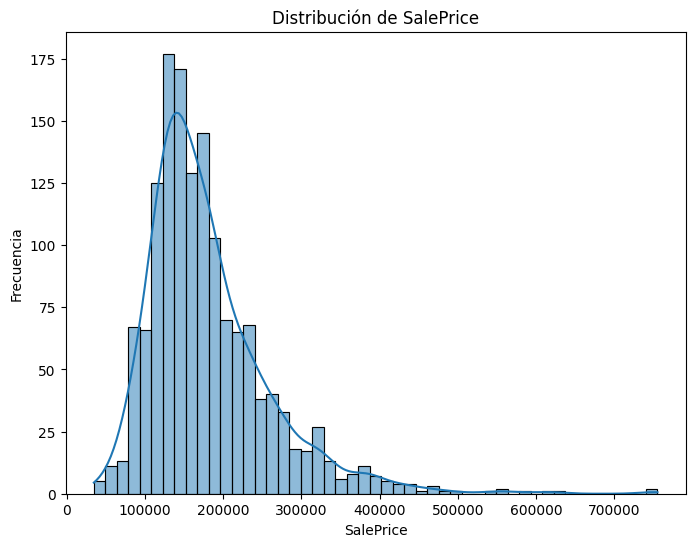

Comparación entre Id y MSSubClass: Estadística=0.8699, p-valor=0.0000
Comparación entre Id y LotFrontage: Estadística=0.8986, p-valor=0.0000
Comparación entre Id y LotArea: Estadística=0.9993, p-valor=0.0000
Comparación entre Id y OverallQual: Estadística=0.9932, p-valor=0.0000
Comparación entre Id y OverallCond: Estadística=0.9938, p-valor=0.0000
Comparación entre Id y YearBuilt: Estadística=1.0000, p-valor=0.0000
Comparación entre Id y YearRemodAdd: Estadística=1.0000, p-valor=0.0000
Comparación entre Id y MasVnrArea: Estadística=nan, p-valor=nan
Comparación entre Id y BsmtFinSF1: Estadística=0.3226, p-valor=0.0000
Comparación entre Id y BsmtFinSF2: Estadística=0.8856, p-valor=0.0000
Comparación entre Id y BsmtUnfSF: Estadística=0.2014, p-valor=0.0000
Comparación entre Id y TotalBsmtSF: Estadística=0.3438, p-valor=0.0000
Comparación entre Id y 1stFlrSF: Estadística=0.4205, p-valor=0.0000
Comparación entre Id y 2ndFlrSF: Estadística=0.5678, p-valor=0.0000
Comparación entre Id y LowQua

In [117]:
df = dataframe.copy()
df2 = df.select_dtypes(include='number').copy()


for column in df2.columns:
    stat, p_value = shapiro(df[column])
    print(f'Columna {column}: Estadística={stat:.4f}, p-valor={p_value:.4f}')
    
    # Interpretación del resultado
    if p_value > 0.05:
        print(f'\033[92mLa columna {column} sigue una distribución normal.\033[0m')
    else:
        print(f'\033[91mLa columna {column} no sigue una distribución normal.\033[0m')
    

for column in df2.columns:
    result = anderson(df[column])
    statistic = result.statistic
    critical_values = result.critical_values
    significance_level = result.significance_level

    print(f'Columna {column}: Estadística={statistic:.4f}')

    # Comparar la estadística con los valores críticos
    for i, alpha in enumerate([15.0, 10.0, 5.0, 2.5, 1.0]):
        if statistic > critical_values[i]:
            print(f'La columna {column} no sigue una distribución normal al {alpha}% de confianza.')
            break
    else:
        print(f'\033[92mLa columna {column} sigue una distribución normal al 1% de confianza.\033[0m')



for column in df2.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df2[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Prueba de Kolmogorov-Smirnov para cada par de columnas
for i in range(len(df2.columns)):
    for j in range(i+1, len(df2.columns)):
        stat, p_value = ks_2samp(df2.iloc[:, i], df2.iloc[:, j])
        print(f'Comparación entre {df2.columns[i]} y {df2.columns[j]}: Estadística={stat:.4f}, p-valor={p_value:.4f}')



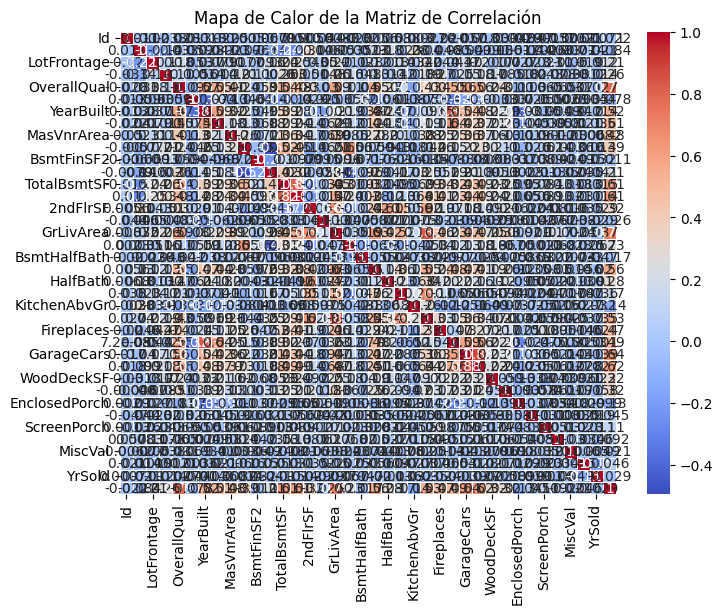

In [ ]:
df_numeric = dataframe.select_dtypes(include='number').copy()

# Mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

## Descripcion de variables

- MSSubClass: Cuantitativa Discreta

- MSZoning: Cualitativa Categorica
	
- LotFrontage: Cuantitativa Medible

- LotArea: Cuantitativa Medible

- Street: Cualitativa Categorica
       	
- Alley: Cualitativa Categorica
		
- LotShape: Cualitativa Categorica
       
- LandContour: Cualitativa Categorica
		
- Utilities: Cualitativa Categorica	
	
- LotConfig: Cualitativa Categorica
	
- LandSlope: Cualitativa Categorica 
	
- Neighborhood: Cualitativa Categorica
			
- Condition1: Cualitativa Categorica
	
- Condition2: Cualitativa Categorica
	
- BldgType: Cualitativa Categorica
	
- HouseStyle: Cualitativa Categorica 
	
- OverallQual: Cuantitativa Discreta
	
- OverallCond: Cuantitativa Discreta
		
- YearBuilt: Cuantitativa Discreta

- YearRemodAdd: Cuantitativa Discreta

- RoofStyle: Cualitativa Categorica
		
- RoofMatl: Cualitativa Categorica
		
- Exterior1st: Cualitativa Categorica
	
- Exterior2nd: Cualitativa Categorica
	
- MasVnrType: Cualitativa Categorica
	
- MasVnrArea: Cuantitativa Continua

- ExterQual: Cualitativa Categorica 
		
- ExterCond: Cualitativa Categorica
		
- Foundation: Cualitativa Categorica
		
- BsmtQual: Cualitativa Ordinal
		
- BsmtCond: Cualitativa Categorica
	
- BsmtExposure: Cualitativa Categorica 
	
- BsmtFinType1: Cualitativa Categorica
		
- BsmtFinSF1: Cuantitativa Continua

- BsmtFinType2: Cualitativa Categorica

- BsmtFinSF2: Cuantitativa Continua

- BsmtUnfSF: Cuantitativa Continua

- TotalBsmtSF: Cuantitativa Continua

- Heating: Cualitativa Categorica
		
- HeatingQC: Cualitativa Categoriica
		
- CentralAir: Cualitativa Categorica
		
- Electrical: Cualitativa Categorica
		
- 1stFlrSF: Cuantitativa Continua
 
- 2ndFlrSF: Cuantitativa Continua

- LowQualFinSF: Cuantitativa Continua

- GrLivArea: Cuantitativa Continua

- BsmtFullBath: Cuantitativa Discreta

- BsmtHalfBath: Cuantitativa Discreta

- FullBath: Cuantitativa Discreta

- HalfBath: Cuantitativa Discreta

- Bedroom: Cuantitativa Discreta

- Kitchen: Kitchens above grade

- KitchenQual: Cualitativa Categorica
       	
- TotRmsAbvGrd: Cuantitativa Discreta

- Functional: Cualitativa Categorica
		
- Fireplaces: Cuantitativa Discreta

- FireplaceQu: Cualitativa Categorica
		
- GarageType: Cualitativa Categorica
		
- GarageYrBlt: Cuantitativa Discreta
		
- GarageFinish: Cualitativa Categorica
		
- GarageCars: Cuantitativa Discreta

- GarageArea: Cuantitativa Continua

- GarageQual: Cualitativa Categorica
		
- GarageCond: Cualitativa Categorica 
		
- PavedDrive: Cualitativa Categorica
		
- WoodDeckSF: Cuantitativa Continua

- OpenPorchSF: Cuantitativa Continua

- EnclosedPorch: Cuantitativa Continua

- 3SsnPorch: TCuantitativa Continua

- ScreenPorch: Cuantitativa Continua

- PoolArea: Cuantitativa Continua

- PoolQC: Cualitativa Categorica
		
- Fence: Cualitativa Categorica
	
- MiscFeature: Cualitativa Categorica
		
- MiscVal: Cuantitativa Discreta

- MoSold: Cuantitativa Discreta

- YrSold: Cuantitativa Discreta

- SaleType: Cualitativa Categorica
		
- SaleCondition: Cualitativa Categorica

# Ejercicio 4
## Responda las siguientes preguntas:

1. ¿Cuáles son las 10 películas que contaron con más presupuesto?

In [ ]:
dataframe.columns

Index(['budget', 'genres', 'homePage', 'productionCompany',
       'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime',
       'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter',
       'originalTitle', 'title', 'originalLanguage', 'popularity',
       'releaseDate', 'voteAvg', 'voteCount', 'genresAmount',
       'productionCoAmount', 'productionCountriesAmount', 'actorsAmount',
       'castWomenAmount', 'castMenAmount'],
      dtype='object')

Al identificar el índice de la película con más votos se encontró que la misma es "The Shawshank Redemption". A continuación se muestra una descripción general de las propiedades de la película.   

In [ ]:
#Inciso 4.3.
indexMaxVotes = dataframe['voteCount'].idxmax()
movieMaxVotes = dataframe.loc[indexMaxVotes]
print(movieMaxVotes)


NameError: name 'dataframe' is not defined